In [442]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [443]:
df = pd.read_csv('insurance_claims.csv')

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [445]:
df.drop(['_c39'], axis=1, inplace=True)

In [446]:
print(df['authorities_contacted'].isna().sum())
print(df['authorities_contacted'].value_counts())

# fill df['authorities_contacted'] with mode
df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0], inplace=True)

91
authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64


C:\Users\Joseph\AppData\Local\Temp\ipykernel_18124\3255667122.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0], inplace=True)


In [447]:
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].isna().sum())

policy_bind_date 0
policy_state 0
policy_csl 0
insured_sex 0
insured_education_level 0
insured_occupation 0
insured_hobbies 0
insured_relationship 0
incident_date 0
incident_type 0
collision_type 0
incident_severity 0
authorities_contacted 0
incident_state 0
incident_city 0
incident_location 0
property_damage 0
police_report_available 0
auto_make 0
auto_model 0
fraud_reported 0


In [448]:
print(df['authorities_contacted'].value_counts())

authorities_contacted
Police       383
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64


In [449]:
for col in df.select_dtypes(include='object').columns:
    df[col].replace('?', df[col].mode()[0], inplace=True)

C:\Users\Joseph\AppData\Local\Temp\ipykernel_18124\562359568.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace('?', df[col].mode()[0], inplace=True)


array([[<Axes: title={'center': 'months_as_customer'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'policy_number'}>,
        <Axes: title={'center': 'policy_deductable'}>],
       [<Axes: title={'center': 'policy_annual_premium'}>,
        <Axes: title={'center': 'umbrella_limit'}>,
        <Axes: title={'center': 'insured_zip'}>,
        <Axes: title={'center': 'capital-gains'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'incident_hour_of_the_day'}>,
        <Axes: title={'center': 'number_of_vehicles_involved'}>,
        <Axes: title={'center': 'bodily_injuries'}>],
       [<Axes: title={'center': 'witnesses'}>,
        <Axes: title={'center': 'total_claim_amount'}>,
        <Axes: title={'center': 'injury_claim'}>,
        <Axes: title={'center': 'property_claim'}>],
       [<Axes: title={'center': 'vehicle_claim'}>,
        <Axes: title={'center': 'auto_year'}>, <Axes: >, <Axes: >]],
      dtype=object)

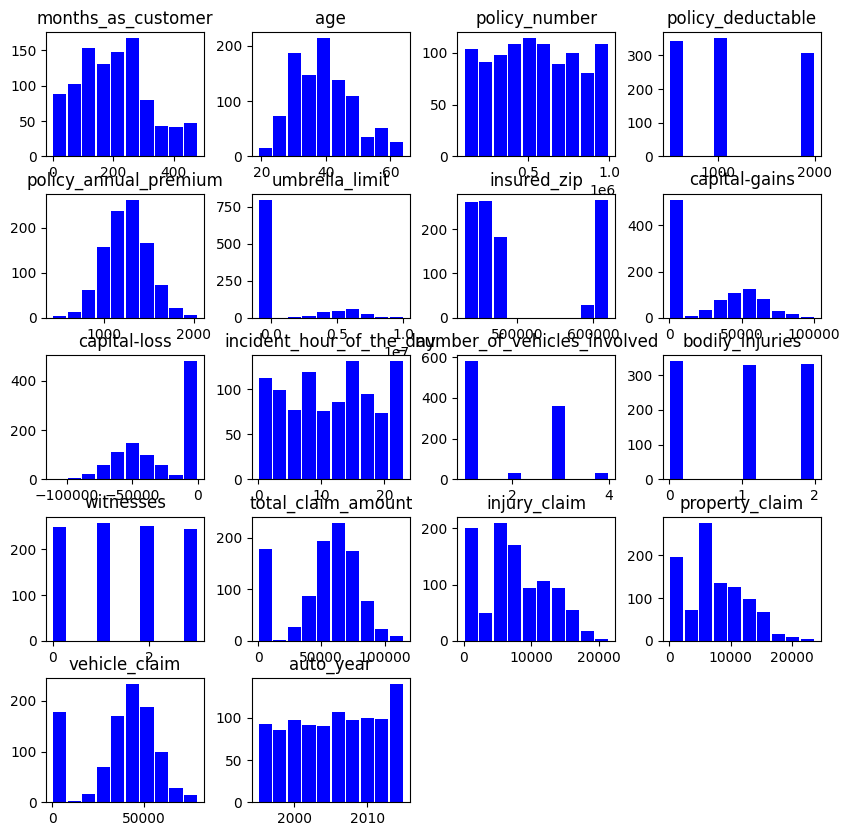

In [450]:
df.hist(bins=10, grid=False, color='blue', zorder=2, rwidth=0.9, figsize=(10, 10))

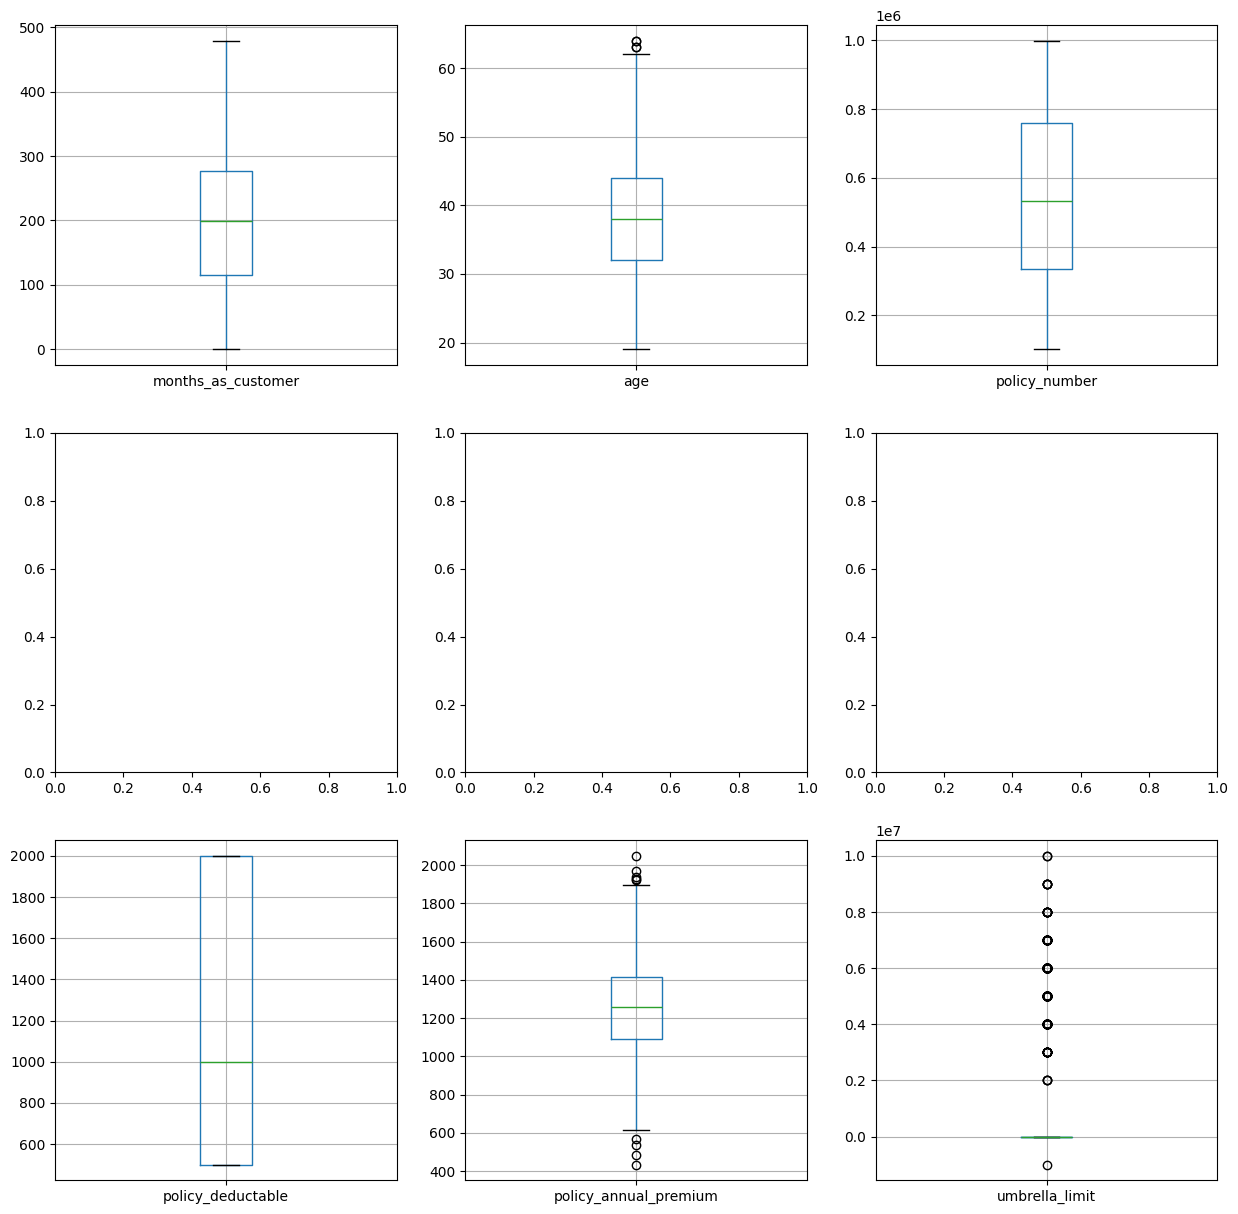

In [451]:
# boxplot in subplots for every non-object column in a single plot
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for variable, subplot in zip(df.columns, ax.flatten()):
    if df[variable].dtypes != 'object':
        df.boxplot(column=variable, ax=subplot)

In [452]:
# remove outliers via quantiles for every non-object column
for col in df.columns:
    if col == "umbrella_limit":
        continue
    if df[col].dtypes != 'object':
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

<Axes: xlabel='fraud_reported'>

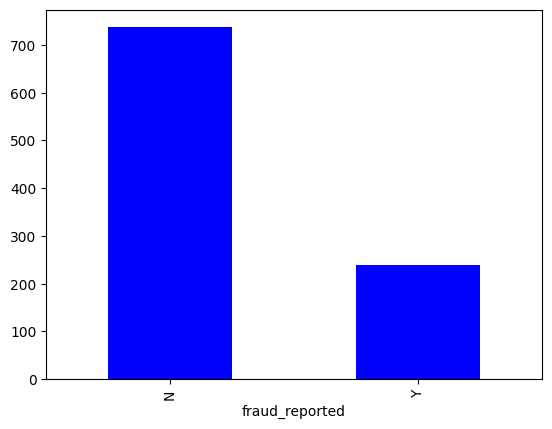

In [453]:
df['fraud_reported'].value_counts().plot(kind='bar', color='blue')

In [454]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

<Axes: >

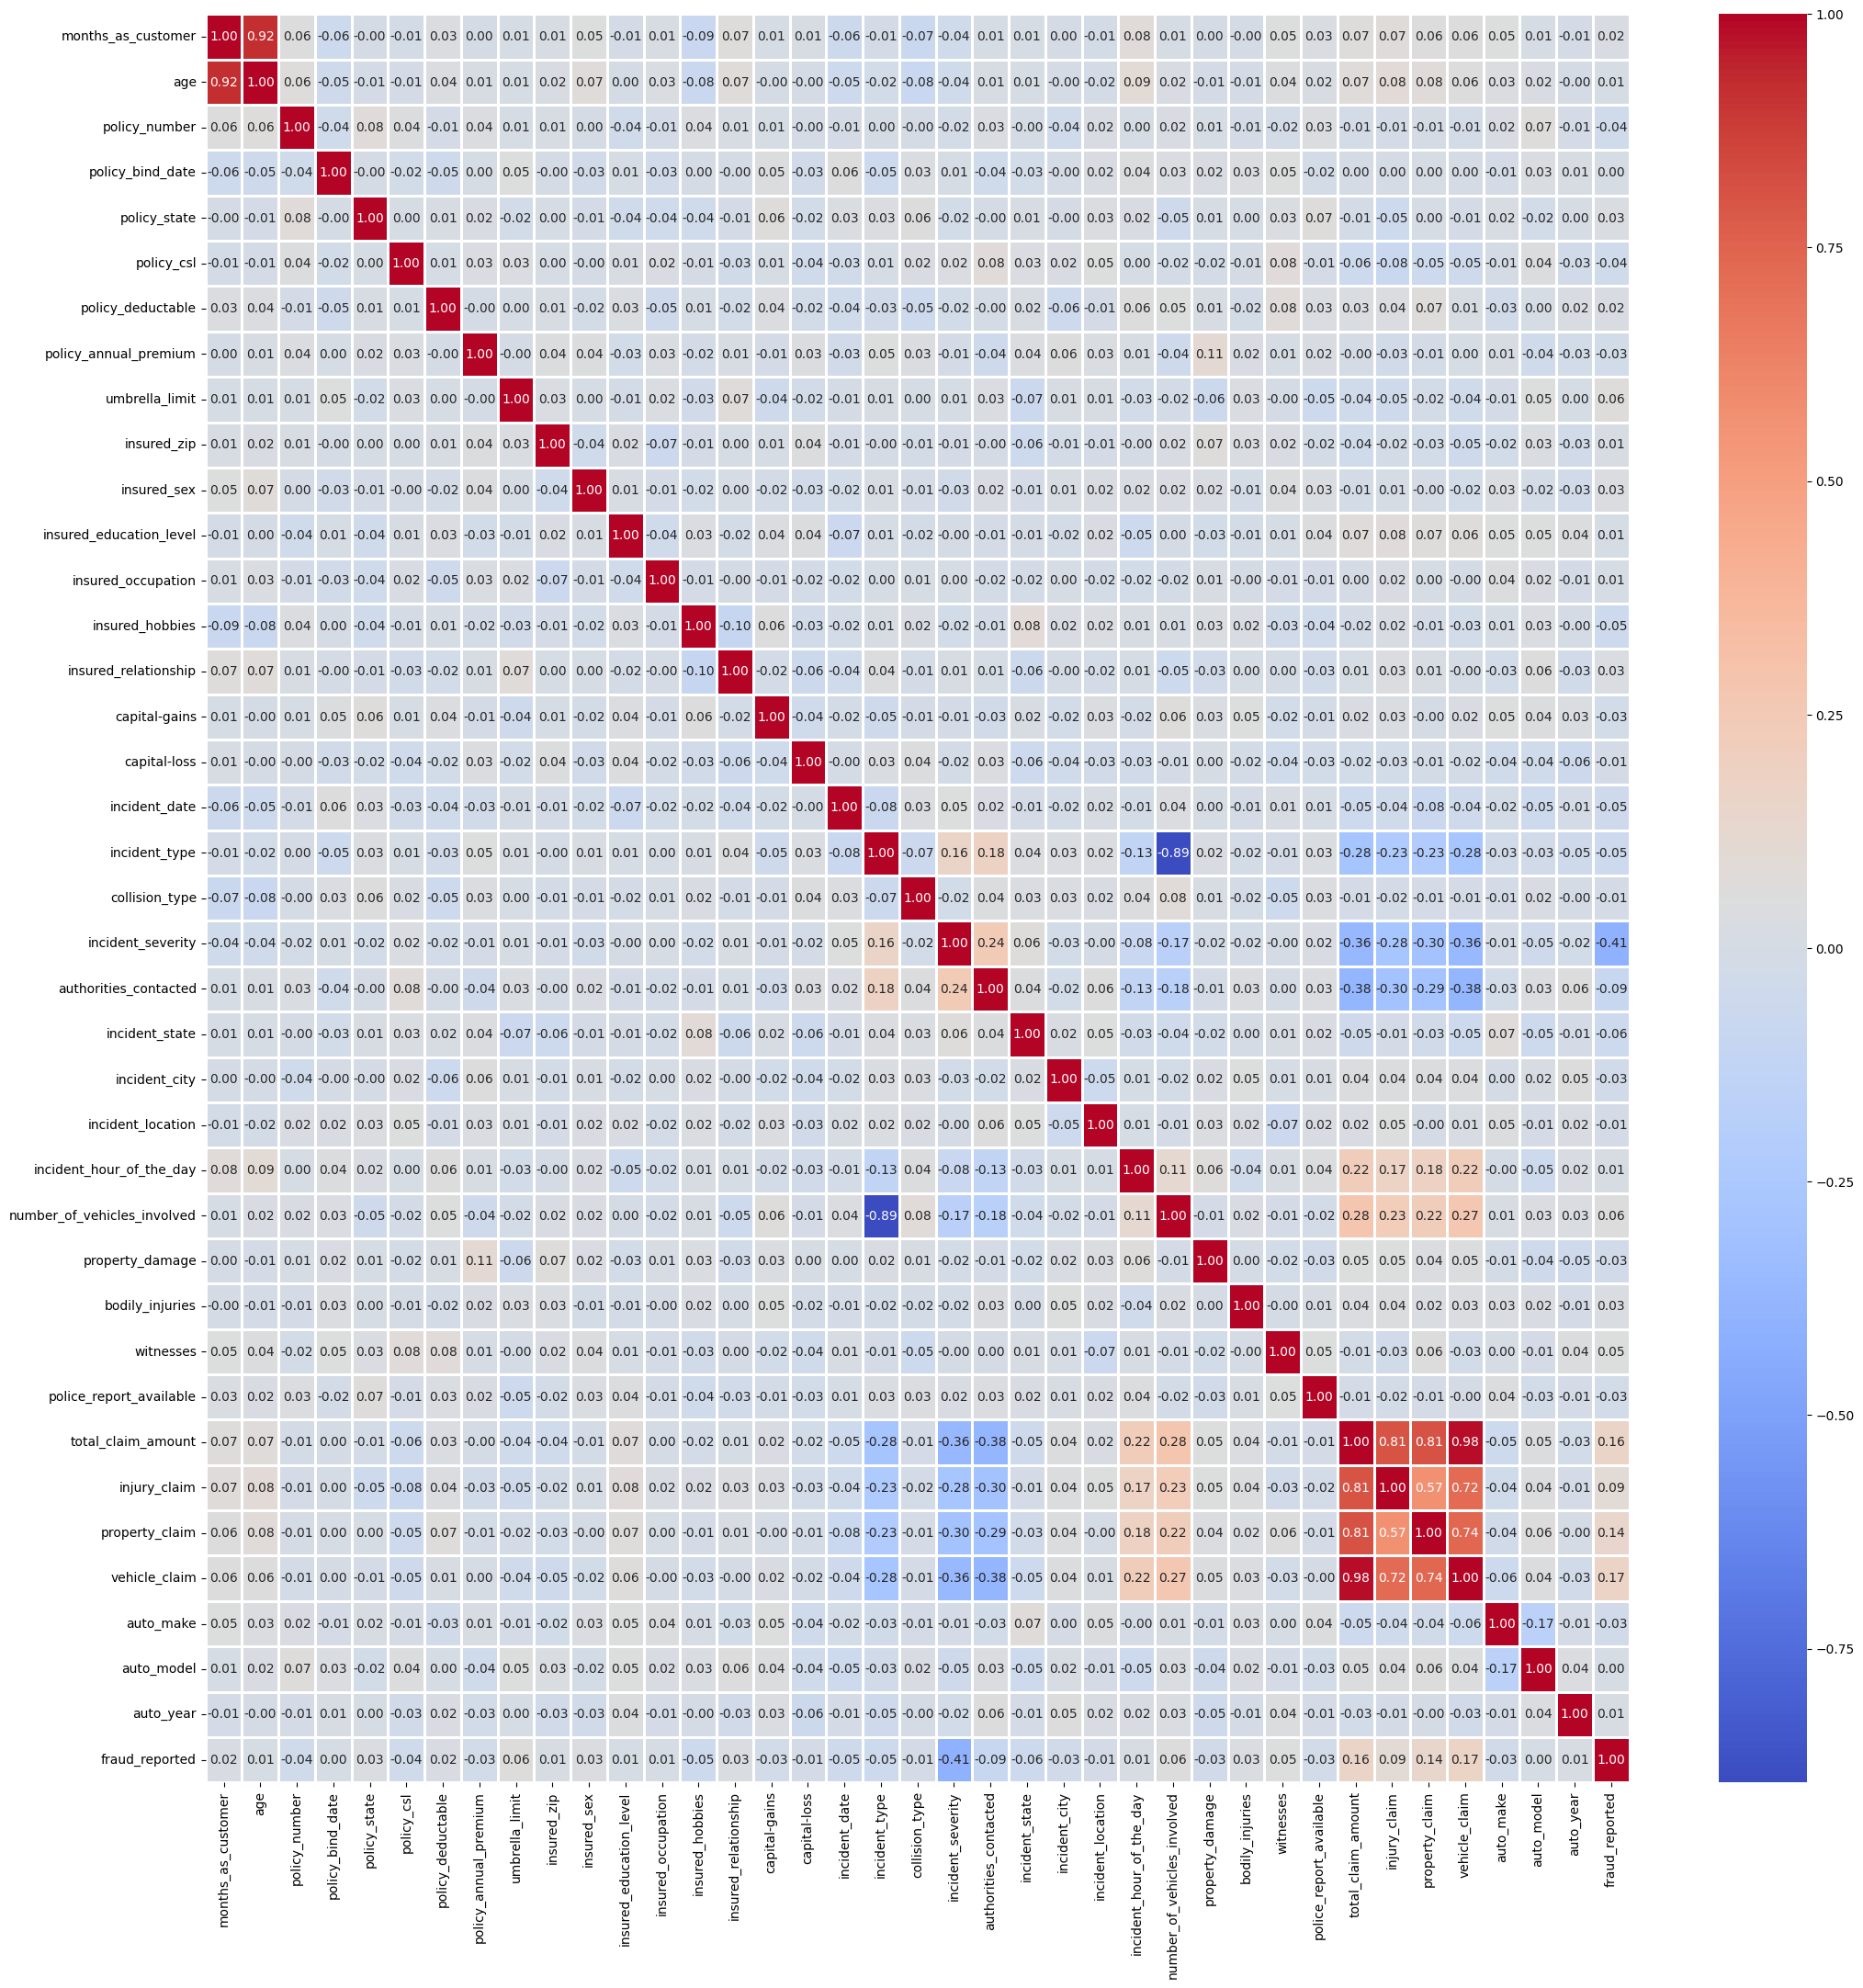

In [455]:
import seaborn as sns

correlation = df.corr()['fraud_reported'].sort_values(ascending=False)

plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)

In [456]:
for col in df.columns:
    if abs(df[col].corr(df['fraud_reported'])) < 0.1:
        df.drop(col, axis=1, inplace=True)

<Axes: >

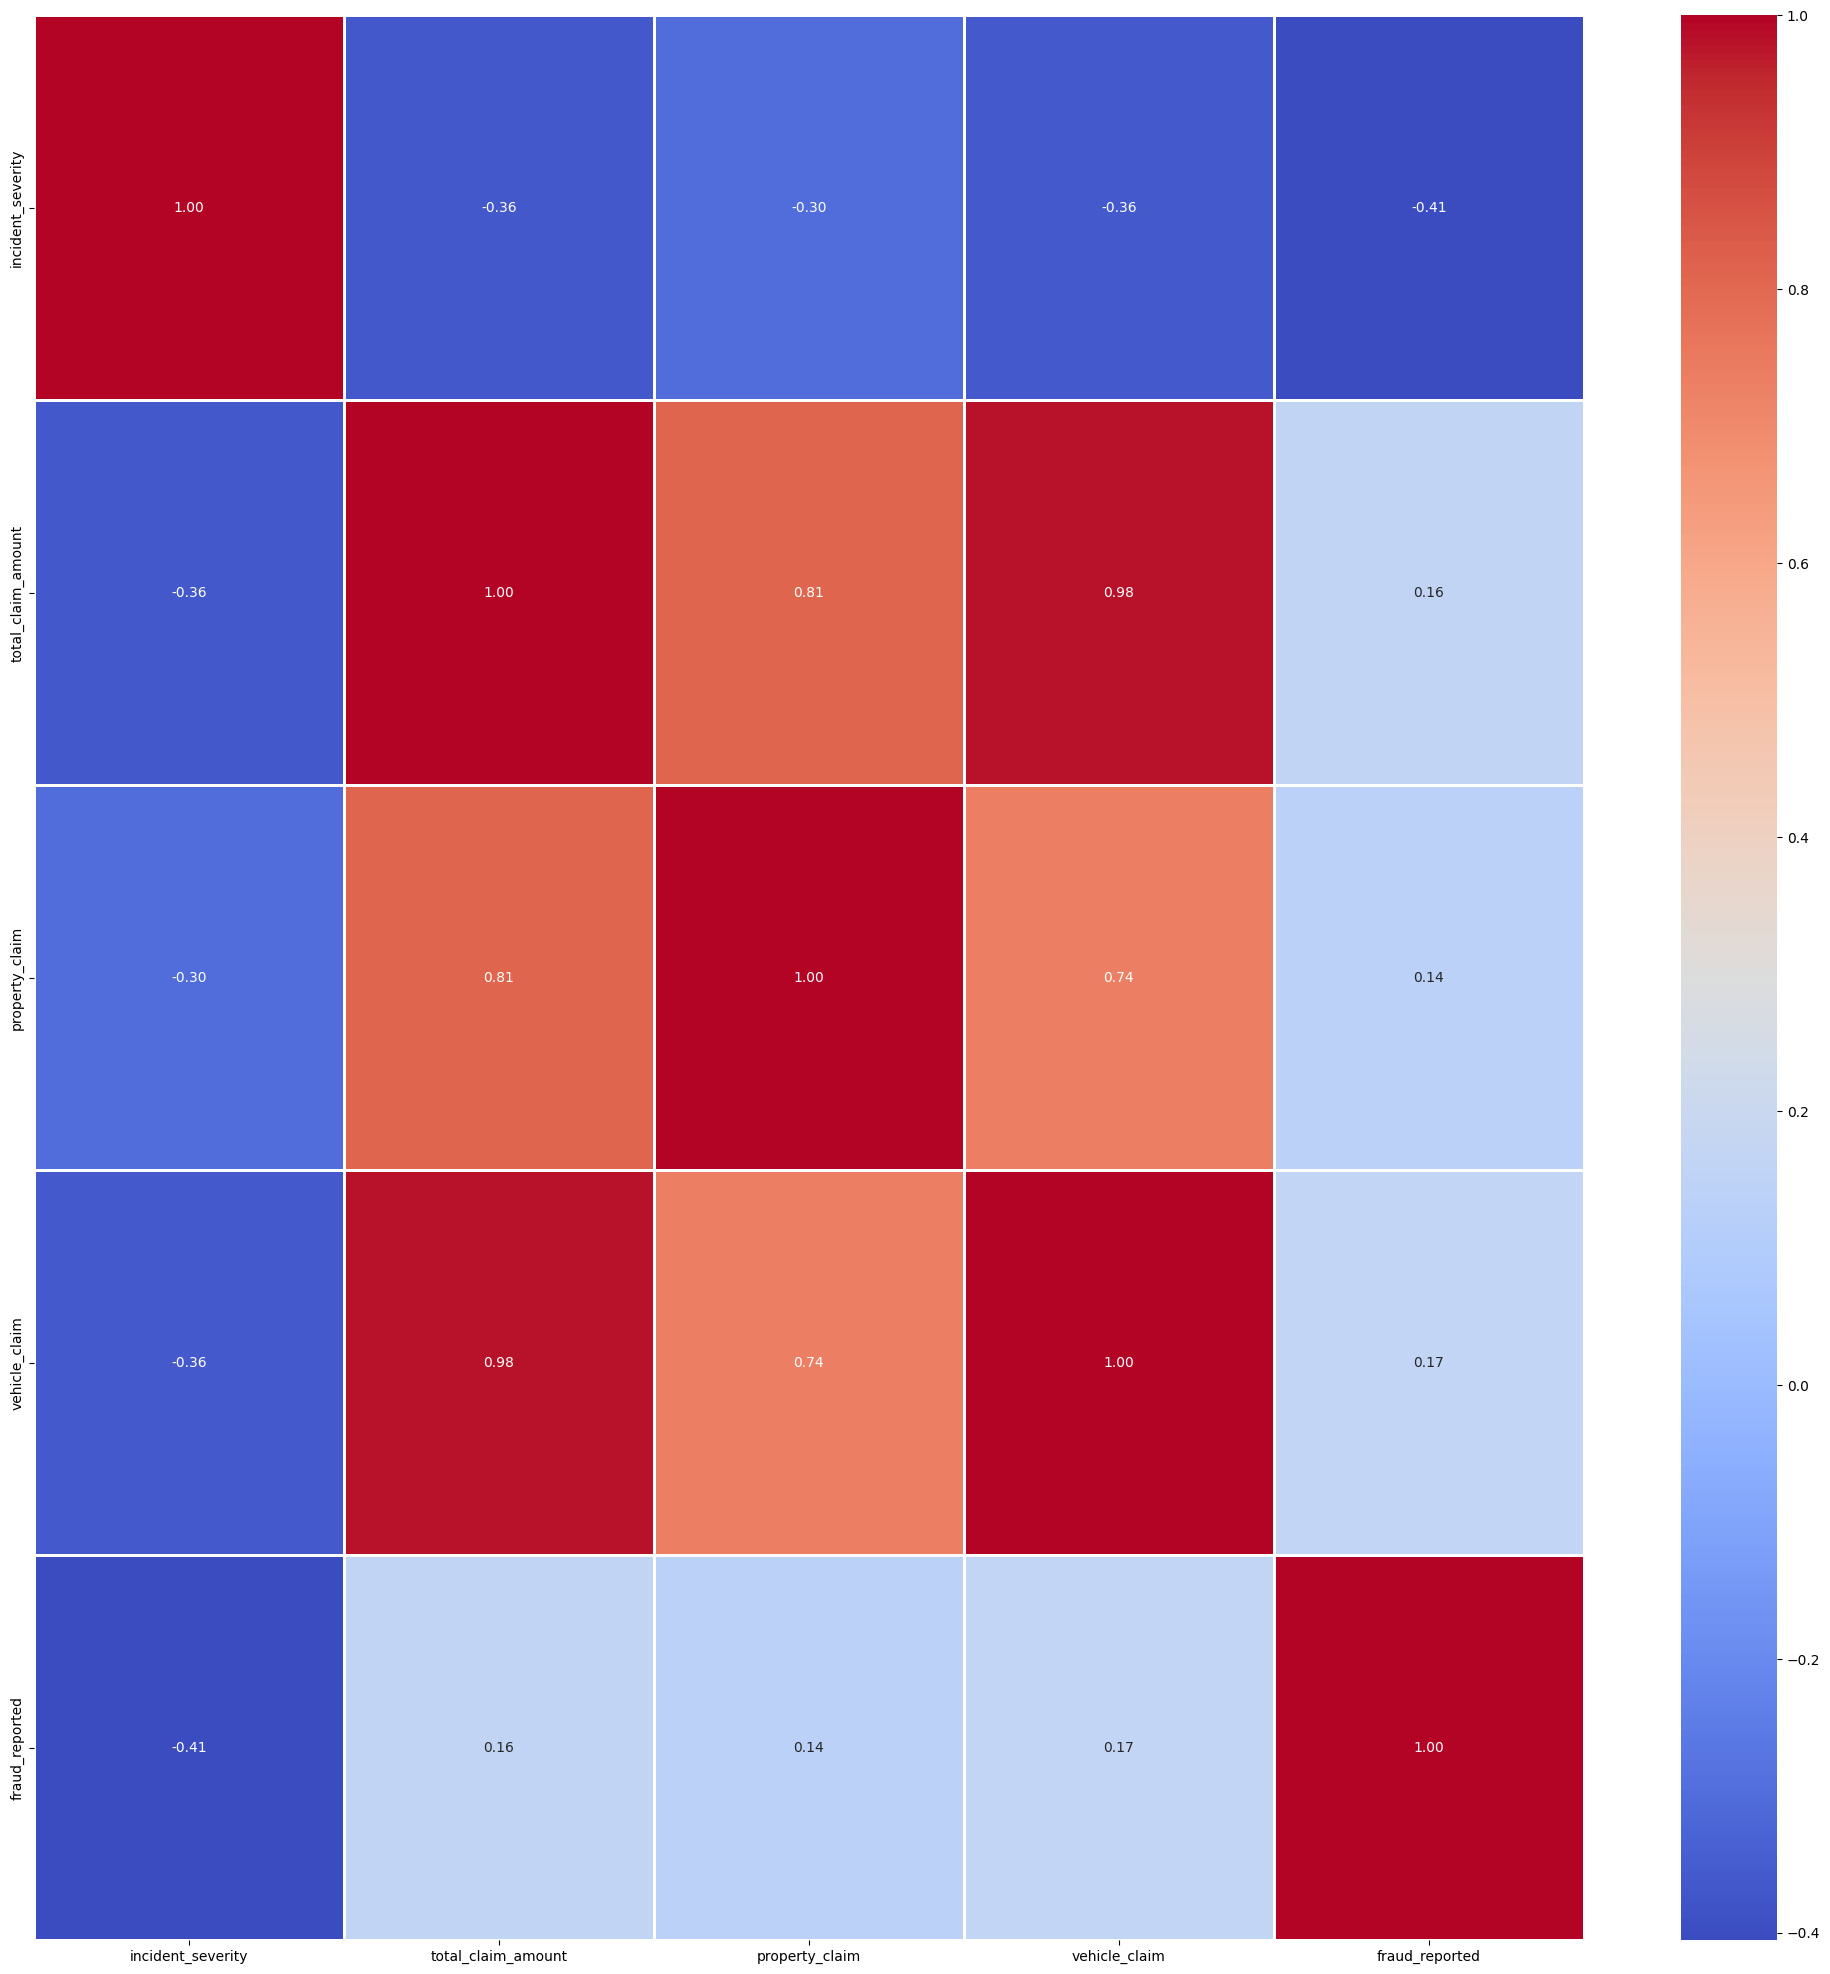

In [457]:
correlation = df.corr()['fraud_reported'].sort_values(ascending=False)

plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)

<Axes: xlabel='fraud_reported'>

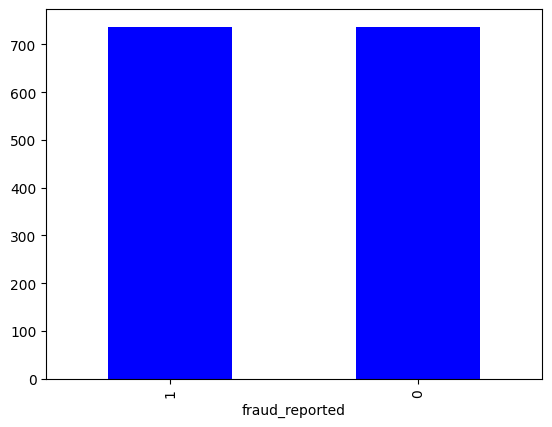

In [458]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

X_smote, y_smote = smote.fit_resample(X, y)

df = pd.concat([X_smote, y_smote], axis=1)

df['fraud_reported'].value_counts().plot(kind='bar', color='blue')

In [461]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

X = df.drop('fraud_reported', axis=1)
y = df['fraud_reported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=43)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

rf = RandomForestClassifier(**grid_search.best_params_)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.8156995102061112
0.8333333333333334
0.8366533864541833


In [469]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300, 400, 500]
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

lr = LogisticRegression(**grid_search.best_params_)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
{'C': 10, 'max_iter': 100}
0.7790613112553144
